In [10]:
# !pip install pycaret
!unzip '/content/aviachipta-narxini-bashorat-qilish (1) (1).zip'

Archive:  /content/aviachipta-narxini-bashorat-qilish (1) (1).zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pycaret

In [12]:
tes = pd.read_csv('/content/test_data.csv',index_col=0)
tran = pd.read_csv('/content/train_data.csv',index_col=0)
tran.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


Dataset Description
Ushbu maʼlumotlar toʻplami quyidagilarni o'z ichiga oladi:

Tarkib:

ID: Ketma - ketlik uchun qo'yilgan sonlar.

Airline: Parvoz qilingan aviakompaniya nomi.

Flight: Parvoz qilingan ID raqami.

Source_city: Parvoz qaysi shahardan boshlanishi.

Departure_time: Samolyotning ketish vaqti.

Stop: Parvoz davomida to'xtashlar soni.

Arrival_time: Qaytish vaqti.

Destination_city: Qaysi davlatga parvoz qilinayotgani.

Class: Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

Duration: Parvoz davomiyligi.

Days_left: Samolyotning qancha vaqtdan keyin qaytishi.

In [ ]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [ ]:
tran.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


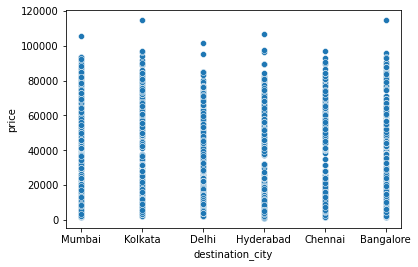

In [ ]:
sns.scatterplot(data=tran, x="destination_city", y="price")

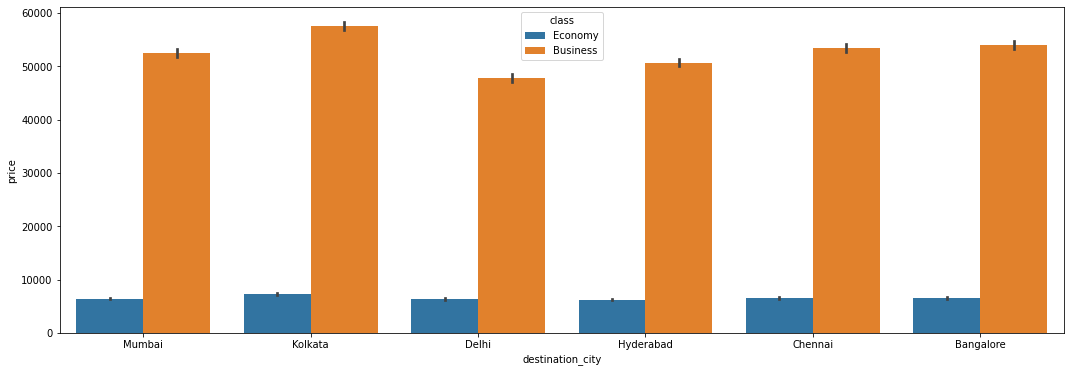

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(data=tran, x="destination_city", y="price", hue="class")

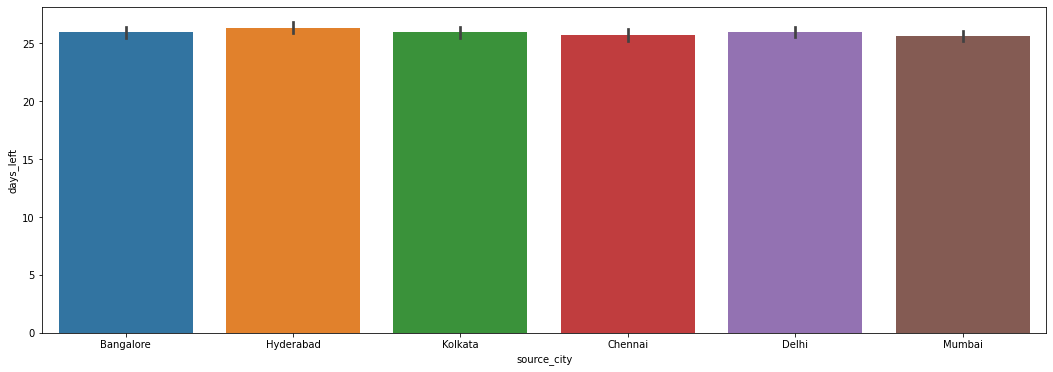

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(data=tran, x="source_city", y="days_left")

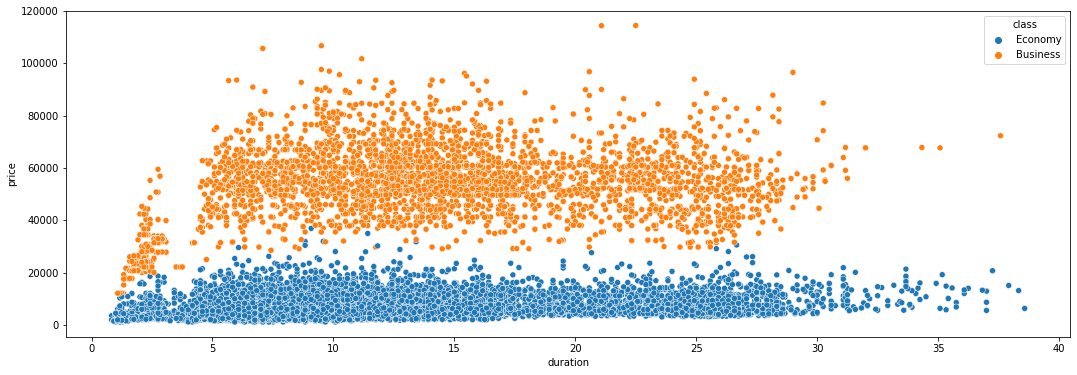

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=tran, x="duration", y="price", hue="class")

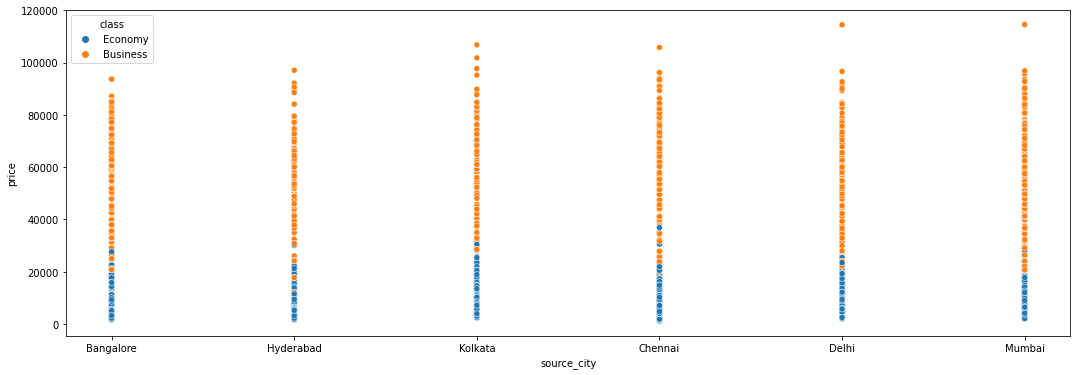

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=tran, x="source_city", y="price", hue="class")

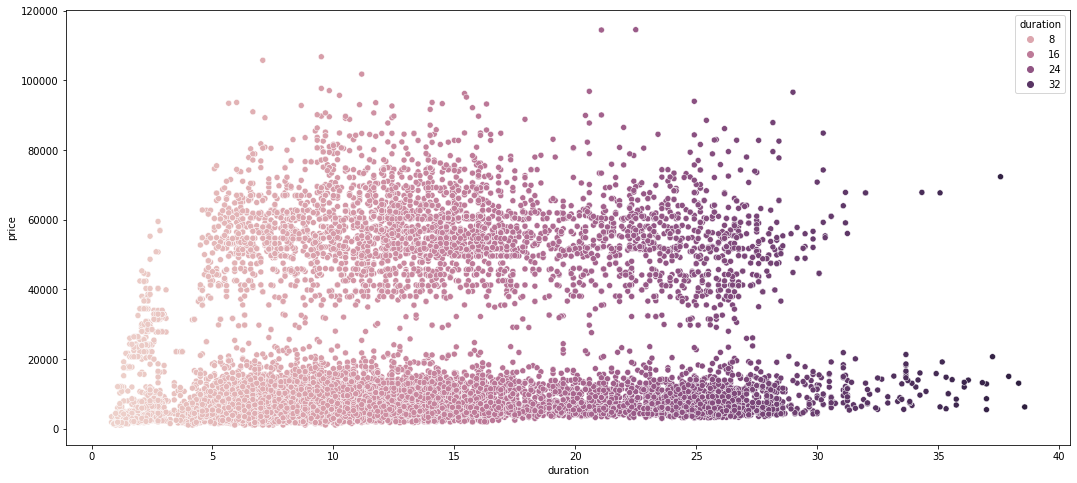

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=tran, x="duration", y="price", hue="duration")

In [ ]:
tran['arrival_time'].value_counts()

Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: arrival_time, dtype: int64

In [ ]:
from pycaret.regression import *
exp_name = setup(data = tran,  target = 'price')
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1741.3178,1.266743e+07,3549.8259,0.9757,0.1910,0.1182,41.845
et,Extra Trees Regressor,1610.8911,1.379032e+07,3703.8312,0.9735,0.1916,0.1094,61.238
lightgbm,Light Gradient Boosting Machine,2306.8301,1.561661e+07,3943.1711,0.9701,0.2483,0.1789,0.524
dt,Decision Tree Regressor,1942.4637,2.154407e+07,4630.6842,0.9586,0.2383,0.1332,0.689
gbr,Gradient Boosting Regressor,2934.2373,2.420492e+07,4911.9436,0.9536,0.2675,0.2150,15.098
ada,AdaBoost Regressor,3963.2162,3.667315e+07,6051.6421,0.9294,0.4007,0.3783,28.502
ridge,Ridge Regression,4440.8864,4.099488e+07,6396.2514,0.9212,0.6476,0.5090,0.513
lasso,Lasso Regression,4428.5752,4.121477e+07,6413.3108,0.9208,0.6477,0.4927,7.259
lar,Least Angle Regression,4413.3146,4.159023e+07,6442.4615,0.9201,0.6508,0.4829,1.129
omp,Orthogonal Matching Pursuit,4486.5567,4.226664e+07,6495.2994,0.9188,0.6634,0.4987,0.530


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7867, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [13]:
tran.drop(columns = ['flight'],inplace = True)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
airline = enc.fit_transform(tran[['airline']])
source_city = enc.fit_transform(tran[['source_city']])
departure_time = enc.fit_transform(tran[['departure_time']])
stops = enc.fit_transform(tran[['stops']])
arrival_time	 = enc.fit_transform(tran[['arrival_time']])
destination_city = enc.fit_transform(tran[['destination_city']])
clas = enc.fit_transform(tran[['class']])

tran['airline'] = airline
tran['source_city'] = source_city
tran['departure_time'] = departure_time
tran['stops'] = stops
tran['arrival_time'] = arrival_time
tran['destination_city'] = destination_city
tran['class'] = clas
tran.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,
1,5.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
2,4.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
3,5.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
4,5.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
5,3.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [15]:
tran.to_csv('Mohir_pro.csv')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
airline = enc.fit_transform(tran[['airline']])
source_city = enc.fit_transform(tran[['source_city']])
departure_time = enc.fit_transform(tran[['departure_time']])
stops = enc.fit_transform(tran[['stops']])
arrival_time	 = enc.fit_transform(tran[['arrival_time']])
destination_city = enc.fit_transform(tran[['destination_city']])
clas = enc.fit_transform(tran[['class']])

tran['airline'] = airline
tran['source_city'] = source_city
tran['departure_time'] = departure_time
tran['stops'] = stops
tran['arrival_time'] = arrival_time
tran['destination_city'] = destination_city
tran['class'] = clas
tran.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,
1,5.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
2,4.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
3,5.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
4,5.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
5,3.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
airline = enc.fit_transform(tran[['airline']])
source_city = enc.fit_transform(tran[['source_city']])
departure_time = enc.fit_transform(tran[['departure_time']])
stops = enc.fit_transform(tran[['stops']])
arrival_time	 = enc.fit_transform(tran[['arrival_time']])
destination_city = enc.fit_transform(tran[['destination_city']])
clas = enc.fit_transform(tran[['class']])

tran['airline'] = airline
tran['source_city'] = source_city
tran['departure_time'] = departure_time
tran['stops'] = stops
tran['arrival_time'] = arrival_time
tran['destination_city'] = destination_city
tran['class'] = clas
tran.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,
1,5.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
2,4.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
3,5.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
4,5.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
5,3.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [ ]:
X = tran.drop(columns = ['price'])
Y = tran['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7867, verbose=0, warm_start=False)
regr.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7867, verbose=0, warm_start=False)

In [16]:
tes.drop(columns = ['flight'],inplace = True)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
airline = enc.fit_transform(tes[['airline']])
source_city = enc.fit_transform(tes[['source_city']])
departure_time = enc.fit_transform(tes[['departure_time']])
stops = enc.fit_transform(tes[['stops']])
arrival_time	 = enc.fit_transform(tes[['arrival_time']])
destination_city = enc.fit_transform(tes[['destination_city']])
clas = enc.fit_transform(tes[['class']])

tes['airline'] = airline
tes['source_city'] = source_city
tes['departure_time'] = departure_time
tes['stops'] = stops
tes['arrival_time'] = arrival_time
tes['destination_city'] = destination_city
tes['class'] = clas
tes.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,
1,1.0,4.0,2.0,0.0,5.0,2.0,0.0,28.25,2
2,5.0,2.0,1.0,0.0,5.0,5.0,0.0,13.83,34
3,1.0,5.0,1.0,2.0,1.0,1.0,0.0,2.00,30
4,0.0,3.0,5.0,0.0,3.0,2.0,1.0,5.17,26
5,1.0,4.0,5.0,0.0,0.0,5.0,1.0,16.33,35


In [ ]:
pre = regr.predict(tes)

In [ ]:
model = pd.DataFrame({'id':list(range(1,5001)),'price': pre})
model

,id,price
0,1,55151.38
1,2,60283.45
2,3,23219.14
3,4,2402.37
4,5,5700.41
...,...,...
4995,4996,60393.60
4996,4997,4614.84
4997,4998,50034.44
4998,4999,49548.74


In [ ]:
model.to_csv('Model.csv',index =False)

In [ ]:
dfff = pd.read_csv('/content/sample_solution.csv')
dfff

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4995,4996,0
4996,4997,0
4997,4998,0
4998,4999,0


In [ ]:
tes.shape

(5000, 9)

In [ ]:
pd.read_csv('/content/Model.csv')

,id,price
0,1,55151.38
1,2,60283.45
2,3,23219.14
3,4,2402.37
4,5,5700.41
...,...,...
4995,4996,60393.60
4996,4997,4614.84
4997,4998,50034.44
4998,4999,49548.74


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=45).fit(X, Y)

In [ ]:
pre = reg.predict(tes)
model = pd.DataFrame({'id':list(range(1,5001)),'price': pre})
model.to_csv('Model1.csv',index =False)

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=35)
regressor.fit(X,Y)
pre = regressor.predict(tes)
model = pd.DataFrame({'id':list(range(1,5001)),'price': pre})
model.to_csv('Model2.csv',index =False)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)
model1 = lr.predict(tes)
model = pd.DataFrame({'id':list(range(1,5001)),'price': model1})
model.to_csv('Model3.csv',index =False)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, Y)
model1 = lr.predict(tes)
model = pd.DataFrame({'id':list(range(1,5001)),'price': model1})
model.to_csv('Model3.csv',index =False)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
model = keras.Sequential()
model.add(Dense(units = 5,input_shape = [len(tran.keys())],activation = 'linear'))
model.add(Dense(units = 2,input_shape = (1,),activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.Adam(0.1),metrics=['mean_squared_error'])

In [ ]:
history = model.fit(X,Y, epochs=500,verbose = 0)

ValueError: ignored

In [ ]:
from tensorflow.keras import layers
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(tran))
horsepower = np.array(tran['price'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
print(normalizer.mean.numpy())

[[3.1129000e+00 2.5790000e+00 2.4248519e+00 2.8870016e-01 3.0718992e+00
  2.5834498e+00 6.8764991e-01 1.2177625e+01 2.5924158e+01 2.0960275e+04]]


In [ ]:
normalizer1 = tf.keras.layers.Normalization(axis=-1)
normalizer1.adapt(np.array(tes))

In [ ]:
horsepower_model.predict(tes)

ValueError: ignored

In [ ]:
tes

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,
1,1.0,4.0,2.0,0.0,5.0,2.0,0.0,28.25,2
2,5.0,2.0,1.0,0.0,5.0,5.0,0.0,13.83,34
3,1.0,5.0,1.0,2.0,1.0,1.0,0.0,2.00,30
4,0.0,3.0,5.0,0.0,3.0,2.0,1.0,5.17,26
5,1.0,4.0,5.0,0.0,0.0,5.0,1.0,16.33,35
...,...,...,...,...,...,...,...,...,...
4996,1.0,4.0,0.0,0.0,4.0,0.0,0.0,17.42,15
4997,3.0,4.0,4.0,2.0,0.0,5.0,1.0,3.00,40
4998,1.0,4.0,4.0,0.0,5.0,5.0,0.0,11.17,37


In [ ]:
print(model.predict(tes)) 

ValueError: ignored

In [ ]:
model = keras.Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='BinaryCrossentropy', optimizer='Adam')

model.summary()

NameError: ignored

In [ ]:
from torchvision import transforms
X = transforms.transform(X)

AttributeError: ignored

In [ ]:
X